### 1. For the Happiness.csv dataset provided, please compute an OLS model (it is OK to use a Python library for that purpose) to explain the Happiness Score, in terms of the other variables. Compute, just using pandas and numpy, the standard errors at each 0.5 increment of the score. Plot the data, your OLS estimates and the confidence bounds given by the standard errors at each of the 0.5 increments. (40 points)

In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [2]:
# Read data
df_hscore = pd.read_csv('Happiness.csv')
df_hscore

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,Southern Asia,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,Sub-Saharan Africa,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,Middle East and Northern Africa,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


#### We are going to fit two models in order to compare them. The first one considering only numeric variables as input, for the second model we will also consider the variable Region as a dummy variable

In [3]:
# Select the input data

# Considering only numeric variables
X = df_hscore[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

# Considering Region as a Dummy variable
#X = pd.get_dummies(df_hscore[['Region', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']])

In [4]:
# Normalize data
x_data = np.array(X)
for i in range(0,len(X.columns)):
       x_data[:,i] = (x_data[:,i]-x_data[:,i].mean())/x_data[:,i].std()

x_norm = add_constant(pd.DataFrame(x_data, columns = X.columns))
x_norm

,const,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.0,1.186299,1.392183,1.038507,1.436930,2.772822,0.893092
1,1.0,1.394308,1.322597,1.335903,1.479400,2.479192,0.286472
2,1.0,1.149536,1.465607,1.354712,1.346129,0.109558,1.756145
3,1.0,1.516148,1.253612,1.041788,1.551931,1.988876,1.022396
4,1.0,1.099253,1.282725,1.107924,1.379223,2.461213,0.092141
...,...,...,...,...,...,...,...
152,1.0,-1.358906,-2.593260,-1.519301,0.182540,-0.639785,-0.306272
153,1.0,-1.389834,-2.570014,-1.680443,-1.425056,-0.600845,0.525355
154,1.0,-1.635506,-2.985165,-1.353828,-0.166943,-0.196540,-0.506003
155,1.0,-0.502553,-2.425988,0.316341,-2.081277,0.313562,1.810072


In [5]:
# Fit an Ordinary Least Squares (OLS) Regression estimator
ols_model = OLS(df_hscore[['Happiness Score']], x_norm).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     92.65
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           6.49e-48
Time:                        00:45:05   Log-Likelihood:                -121.49
No. Observations:                 157   AIC:                             257.0
Df Residuals:                     150   BIC:                             278.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             5.3822      0.043    125.656      0.000       5.298       5.467
Economy (GDP per Capita)          0.2967      0.089      3.323      0.001       0.120       0.473
Family                            0.3269      0.061      5.353      0.000       0.206       0.448
Health (Life Expectancy)          0.3284      0.080      4.117      0.000       0.171       0.486
Freedom                           0.2196      0.056      3.902      0.000       0.108       0.331
Trust (Government Corruption)     0.1017      0.051      1.977      0.050    6.67e-05       0.203
Generosity                        0.0213      0.048      0.440      0.660      -0.074       0.117
==============================================================================
Omnibus:                        3.267   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.881
Skew:                          -0.230   Prob(JB):                        0.237
Kurtosis:                       3.479   Cond. No.                         4.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For the first model we got an $R_1^2 = 0.788$ with 7 coefficients (6 variables and 1 constant), and for the second we got and $R_2^2 = 0.831$ with 17 coefficients (16 variables and 1 constant). We decided to keep the first model because there is not a relevant increment in the coefficient of determination ($R$) and the variables are more than double.

#### We can say that Economy, Family and Health are the three principal components that influence in the Happiness Score, following by Freedom, in the case of Trust and Generosity are the less impact components in Happiness Score.

In [6]:
# New dataframe column with the OLS predictions
df_hscore['OLS_fit'] = ols_model.predict()

In [7]:
# Create a dataframe with Happiness Score and OLS_values and the normalized data
df_norm = df_hscore[['Happiness Score', 'OLS_fit']]
df_norm[x_norm.columns] = x_norm

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Now, to compute the standard errors at each 0.5 increments of the OLS_fit it is, algebraically speaking, not possible, because we can get the same Happiness Score estimate with infinite number of variable values combinations, due to the input variables are independent each other.

#### For this reason we propose to do the following: Round the estimated score (OLS_fit) from data to one decimal and extract them and their corresponding variables value, obtaining probably more than one combination for each increment due that there is not available the exact 0.5 increments of OLS_fit in data, then we calculate the standard errors and the confidence bound with these combinations, finally we plot the Happiness Scores vs OLS_fit (the Happiness Score estimated) and their confidence intervals.

In [8]:
inc = np.arange(np.array(df_norm[['OLS_fit']]).min().round(),np.array(df_norm[['OLS_fit']]).max().round()+0.5,0.5)
select_values = df_norm.loc[df_hscore['OLS_fit'].round(1).isin(inc)]

#### In order to obtain the standard error in each 0.5 increments, we apply the following formula:
$$\hat{\sigma}_{\hat{y_i}} = \hat{\sigma}_\epsilon \sqrt{X(X^TX)^{-1}X}$$

#### where $\hat{\sigma}_\epsilon=\frac{\sum_{i=1}^n\epsilon_i^2}{n-p-1}$, and $X$ is the data.

In [9]:
# Calculate residuals, degrees of freedom and evaluate the selected values with OLS model's paramaters
res = df_hscore['Happiness Score'] - df_hscore['OLS_fit']
n = len(x_norm)
p = len(x_norm.columns)
dof = n - p - 1
x_eval = np.array(ols_model.params*select_values[['const', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']])

In [10]:
# Calculate sigma^2(hat) and (X*X^T)^-1
sigma_sq_hat = (res**2).sum()/dof
X_sq_mat_inv = np.linalg.inv(np.matmul(np.transpose(np.array(x_norm)),np.array(x_norm)))

In [11]:
# Finally, we calculate se_y_hats fo each 0.5 increment in the score
se_y_hat = np.zeros((select_values.shape[0],1))
for i in range(select_values.shape[0]):
    se_y_hat[i]=np.sqrt(sigma_sq_hat*np.matmul(np.matmul(x_eval[i],X_sq_mat_inv),x_eval[i]))

In [12]:
# Now we calculate the confidence bound for each increment combination and create a DataFrame with 0.5 increments
# of Happiness Score, standar error, OLS_fit and its confidence bound
low_OLS_fit = select_values[['OLS_fit']] - 1.96 * se_y_hat
high_OLS_fit = select_values[['OLS_fit']] + 1.96 * se_y_hat 

se_inc = select_values[['Happiness Score', 'OLS_fit']]
se_inc['SE in each increment'] = se_y_hat
se_inc['low_OLS_fit'] = select_values[['OLS_fit']] - 1.96 * se_y_hat
se_inc['high_OLS_fit'] = select_values[['OLS_fit']] + 1.96 * se_y_hat
se_inc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Happiness Score,OLS_fit,SE in each increment,low_OLS_fit,high_OLS_fit
2,7.501,6.991362,0.232635,6.535397,7.447327
4,7.413,7.046680,0.232281,6.591409,7.501950
5,7.404,6.993880,0.232125,6.538914,7.448845
8,7.313,7.046758,0.232222,6.591604,7.501912
14,7.039,6.474525,0.231933,6.019937,6.929113
18,6.907,7.021689,0.232200,6.566578,7.476800
21,6.739,7.027157,0.233163,6.570159,7.484156
31,6.478,6.524168,0.231996,6.069455,6.978881
33,6.379,6.033607,0.233181,5.576572,6.490642
35,6.375,6.969593,0.234894,6.509201,7.429985


<function matplotlib.pyplot.show(*args, **kw)>

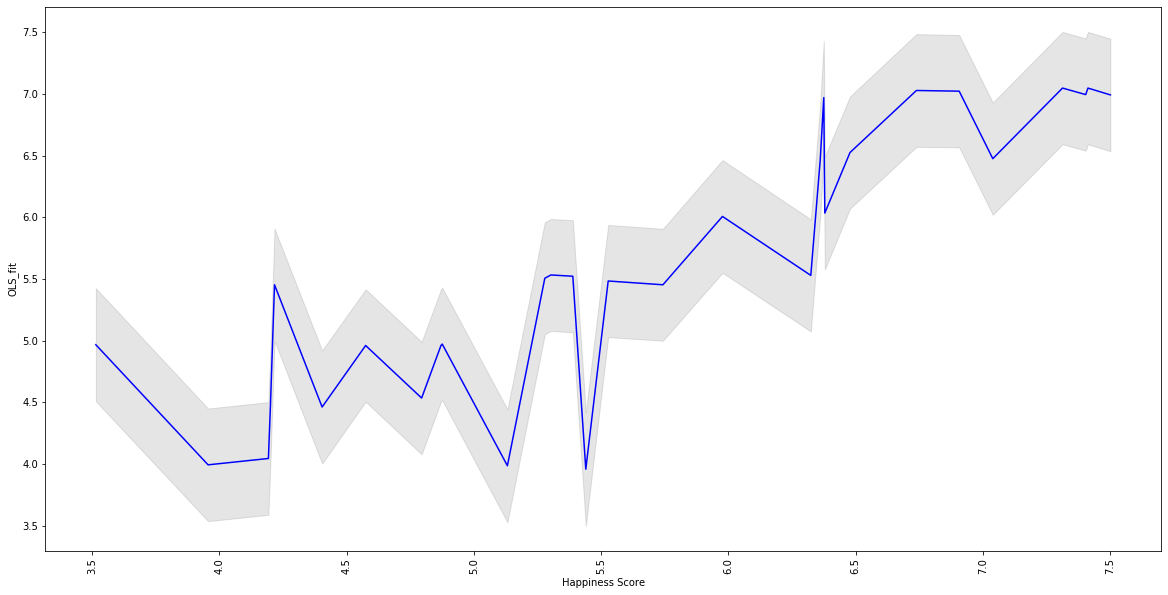

In [13]:
# Plot the Happiness Score vs OLS_fit and the confidence intervals

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(se_inc['Happiness Score'], se_inc['OLS_fit'], color='blue')
plt.fill_between(se_inc['Happiness Score'], se_inc['low_OLS_fit'], se_inc['high_OLS_fit'], color='black', alpha=0.1)
plt.xlabel('Happiness Score')
plt.ylabel('OLS_fit')
plt.show

#### The perfect fit of the model should show a graph similar to y=x, so we can conclude that the OLS model have issues in some Happiness Scores values. We compute a Linear Regression to obtain a relation between the observed Happiness Score and the Happiness Score estimated with an OLS model.

In [14]:
perfect_fit = OLS(se_inc['OLS_fit'], add_constant(se_inc['Happiness Score'])).fit()
perfect_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OLS_fit   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     84.08
Date:                Mon, 13 Jul 2020   Prob (F-statistic):           6.30e-10
Time:                        00:45:06   Log-Likelihood:                -22.924
No. Observations:                  30   AIC:                             49.85
Df Residuals:                      28   BIC:                             52.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1419      0.497      2.296      0.029       0.123       2.161
Happiness Score     0.7907      0.086      9.170      0.000       0.614       0.967
==============================================================================
Omnibus:                        6.150   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.816
Skew:                          -0.621   Prob(JB):                       0.0900
Kurtosis:                       4.521   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""